In [26]:
import pandas as pd
import re

In [27]:
df=pd.read_csv('data//googleplaystore_user_reviews.csv')

In [28]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [29]:
df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [33]:
df1=df.dropna(subset=['Translated_Review'])

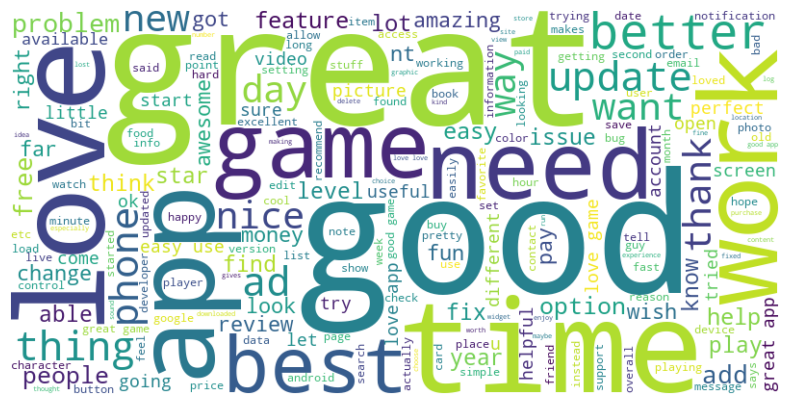

In [59]:
#narysuj wordclou dla positive review i dla negative reviev
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Filtrowanie pozytywnych recenzji
positive_reviews = df1['Review'][df1['Sentiment']=='Positive']
positive_reviews = df1['Translated_Review'][df1['Sentiment']=='Positive']
# Łączenie wszystkich pozytywnych recenzji w jeden długi tekst
positive_text = ' '.join(review for review in positive_reviews)

# Tworzenie chmury słów
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Wyświetlanie chmury słów
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ukrywa osie
plt.show()


In [ ]:
# cwiczenie to samo ale dla negative

In [34]:
df1['Review']=df['Translated_Review'].copy()

C:\Users\giemzaa\AppData\Local\Temp\ipykernel_5180\4194561882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Review']=df['Translated_Review'].copy()


In [35]:
#lowercase+del white spaces
df1['Translated_Review'] = df1['Translated_Review'].map(lambda x: x.lower())
df1['Translated_Review'] = df1['Translated_Review'].map(lambda x: x.strip())
df1['Translated_Review'] = df1['Translated_Review'].map(lambda x: " ".join(x.split()))

#removing uninformative pieces of text

df1['Translated_Review'] = df1['Translated_Review'].map(lambda x: re.sub(r'\@\w+|\#','', x))
df1['Translated_Review'] = df1['Translated_Review'].map(lambda x: re.sub(r'[.,·]', ' ', x))
df1['Translated_Review'] = df1['Translated_Review'].map(lambda x: re.sub(r'\s+', ' ', x))
#df['Total_Review'] = df['Total_Review'].map(lambda x: re.sub(r'[^A-Za-z\s]','', x))
df1.head()

C:\Users\giemzaa\AppData\Local\Temp\ipykernel_5180\2200004908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Translated_Review'] = df1['Translated_Review'].map(lambda x: x.lower())
C:\Users\giemzaa\AppData\Local\Temp\ipykernel_5180\2200004908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Translated_Review'] = df1['Translated_Review'].map(lambda x: x.strip())
C:\Users\giemzaa\AppData\Local\Temp\ipykernel_5180\2200004908.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Review
0,10 Best Foods for You,i like eat delicious food that's i'm cooking f...,Positive,1.00,0.533333,I like eat delicious food. That's I'm cooking ...
1,10 Best Foods for You,this help eating healthy exercise regular basis,Positive,0.25,0.288462,This help eating healthy exercise regular basis
3,10 Best Foods for You,works great especially going grocery store,Positive,0.40,0.875000,Works great especially going grocery store
4,10 Best Foods for You,best idea us,Positive,1.00,0.300000,Best idea us
5,10 Best Foods for You,best way,Positive,1.00,0.300000,Best way


In [36]:
#detekcja jezyka
#3 min
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'
df1['lang'] = df1['Review'].apply(detect_language)

C:\Users\giemzaa\AppData\Local\Temp\ipykernel_5180\1105439999.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['lang'] = df1['Review'].apply(detect_language)


In [37]:
lang_counts = df1['lang'].value_counts()
print(lang_counts)
print(f'Liczba rekordów {df1.shape[0]}')

lang
en         32803
af           648
so           595
ro           339
no           329
sl           298
fr           259
nl           209
de           199
et           196
da           189
it           166
tl           165
ca           152
id           125
pl           115
cy           113
sw            86
sv            66
es            56
sq            43
hr            42
vi            38
pt            37
sk            30
fi            30
cs            29
hu            25
tr            22
unknown       10
lv             7
lt             5
el             1
Name: count, dtype: int64
Liczba rekordów 37427


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Inicjalizacja analizatora sentymentu
sia = SentimentIntensityAnalyzer()

# Przykładowe  słowa do dodania
custom_words = {
    "ok": 1,
    "super": 1,
    "dobry": 1,
    "czysto": 1,
    "pyszne": 1,
    "ładnie": 1,
    "świetne": 1,
    "świetna":1,
    "malowniczo": 1,
    "przytulny": 1,
    "cichy":1,
    "ładny":1,
    "podobał": 1,
    "wyjątkowy": 1,
    "wspaniała": 1,
    "cisza": 1,
    "spokój": 1,
    "polecam":1,
    "czyste":  1,
    "schludnie": 1,
    "przemiłe":1,
    "niezwykłe":1,
    "pomocne":1,
    "zadbane":1,
    "podoba": 1,
    "nie_podoba": -1.0,
    "głośno": -1.0,
    "niemiła": -1.0,
    "hałas": -1,
    "brud":-1,
    "opłata":-0.5,
    "słabe":-0.5,
    "ubogie":-0.5,
    "brak": -1,
    "drogo":-1,
    "fatalne":-1,
    "fatalna":-1,
    "małe":-1,
    "ciasne":-1,
    "ciasno":-1,
    "niedostatecznie": -1,
    "wyciszony":-1

}

# Dodawanie niestandardowych słów do istniejącego słownika VADER
sia.lexicon.update(custom_words)

In [38]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     --- ------------------------------------ 1.0/12.8 MB 2.8 MB/s eta 0:00:05
     ----- ---------------------------------- 1.8/12.8 MB 3.2 MB/s eta 0:00:04
     -------- ------------------------------- 2.6/12.8 MB 3.4 MB/s eta 0:00:04
     --------- ------------------------------ 3.1/12.8 MB 3.2 MB/s eta 0:00:04
     ------------- -------------------------- 4.2/12.8 MB 3.5 MB/s eta 0:00:03
     ---------------- ----------------------- 5.2/12.8 MB 3.8 MB/s eta 0:00:03
     ------------------- -------------------- 6.3/12.8 MB 3.9 MB/s eta 0:00:02
     ---------------------- ----------------- 7.3/12.8 MB 4.0 MB/s eta 0:00:02
     ------------------------- -------------- 8.1/12.8 MB 4.0 MB/s eta 0:00:02
     ---------------------------- ----------- 9.2/12.8 MB 4.1 MB/s eta 0:00:01
     ------------------------------- -------- 10.2/12.8 MB 4.1 MB/

In [ ]:
# 4 min
import spacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Załaduj model spaCy
nlp = spacy.load("en_core_web_sm")

# Załaduj stopwords
stopwords = nlp.Defaults.stop_words

# Inicjalizacja analizatora sentymentu
sia = SentimentIntensityAnalyzer()

# Funkcja usuwająca stopwords
def remove_stopwords(text):
    doc = nlp(text)
    filtered_tokens = [token.text for token in doc if token.text.lower() not in stopwords]
    return ' '.join(filtered_tokens)

# Funkcja do obliczania wyników sentymentu
def polarity_scores(text):
    return sia.polarity_scores(text)['compound']




# Usuń stopwords z recenzji i oblicz wynik sentymentu
df1['Translated_Review'] = df1['Translated_Review'].apply(remove_stopwords)
df1['my_vader_score'] = df1['Translated_Review'].apply(polarity_scores)

# Wyświetlenie wyników dla przetworzonych recenzji
print(df1[['Translated_Review', 'my_vader_score', 'Review','Sentiment_Polarity']].head())

C:\Users\giemzaa\AppData\Local\Temp\ipykernel_5180\2563316163.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Translated_Review'] = df1['Translated_Review'].apply(remove_stopwords)


                                   Translated_Review  my_vader_score  \
0  like eat delicious food cooking food case " 10...          0.9531   
1         help eating healthy exercise regular basis          0.6597   
3         works great especially going grocery store          0.6249   
4                                          best idea          0.6369   
5                                           best way          0.6369   

                                              Review  Sentiment_Polarity  
0  I like eat delicious food. That's I'm cooking ...                1.00  
1    This help eating healthy exercise regular basis                0.25  
3         Works great especially going grocery store                0.40  
4                                       Best idea us                1.00  
5                                           Best way                1.00  


C:\Users\giemzaa\AppData\Local\Temp\ipykernel_5180\2563316163.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['my_vader_score'] = df1['Translated_Review'].apply(polarity_scores)


In [42]:
def scale_vader(x):
    if x <=-0.5:
        return "Negative"
    elif x>=0.5:
        return "Positive"
    else:
        return "Neutal"

In [43]:
df1['My_Sentiment'] = df1['my_vader_score'].apply(scale_vader)

C:\Users\giemzaa\AppData\Local\Temp\ipykernel_5180\3159894082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['My_Sentiment'] = df1['my_vader_score'].apply(scale_vader)


In [45]:
comparing=df1[['Sentiment','My_Sentiment']].value_counts()
comparing

Sentiment  My_Sentiment
Positive   Positive        15987
           Neutal           7544
Neutral    Neutal           4534
Negative   Neutal           4247
           Negative         2603
           Positive         1421
Positive   Negative          467
Neutral    Positive          422
           Negative          202
Name: count, dtype: int64

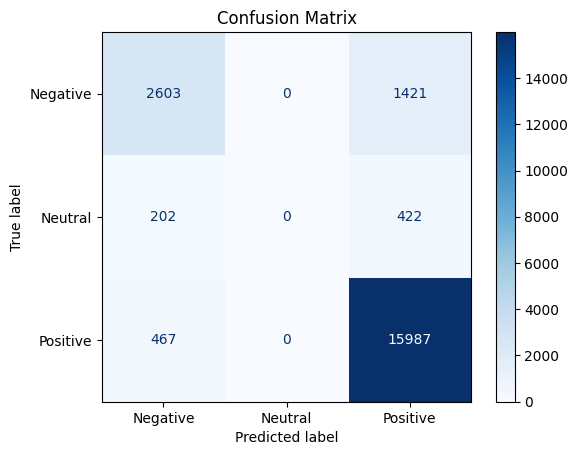

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Pobranie unikalnych etykiet
labels = sorted(df1['Sentiment'].unique())

# Oblicz macierz konfuzji
cm = confusion_matrix(df1['Sentiment'], df1['My_Sentiment'], labels=labels)

# Wyświetl macierz konfuzji
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [56]:
df1.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [53]:
# Znajdź błędne klasyfikacje
incorrect_predictions = df1[df1['Sentiment'] != df1['My_Sentiment']]

# Wyświetl błędne klasyfikacje
print("Błędne klasyfikacje:")
print(incorrect_predictions)


Błędne klasyfikacje:
                                  App  \
8               10 Best Foods for You   
9               10 Best Foods for You   
10              10 Best Foods for You   
11              10 Best Foods for You   
21              10 Best Foods for You   
...                               ...   
64218  Housing-Real Estate & Property   
64220  Housing-Real Estate & Property   
64221  Housing-Real Estate & Property   
64222  Housing-Real Estate & Property   
64230  Housing-Real Estate & Property   

                                       Translated_Review Sentiment  \
8                                    looking forward app   Neutral   
9                            helpful site ! help foods !   Neutral   
10                                                  good  Positive   
11     useful information spelling errors questions v...  Positive   
21                                        healthy helped  Positive   
...                                                  ...       ...

In [55]:
incorrect_predictions=pd.DataFrame(incorrect_predictions)
incorrect_predictions

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Review,lang,my_vader_score,My_Sentiment
8,10 Best Foods for You,looking forward app,Neutral,0.000000,0.000000,"Looking forward app,",en,0.0000,Neutal
9,10 Best Foods for You,helpful site ! help foods !,Neutral,0.000000,0.000000,It helpful site ! It help foods get !,en,0.7256,Positive
10,10 Best Foods for You,good,Positive,0.700000,0.600000,good you.,so,0.4404,Neutal
11,10 Best Foods for You,useful information spelling errors questions v...,Positive,0.200000,0.100000,Useful information The amount spelling errors ...,en,0.4404,Neutal
21,10 Best Foods for You,healthy helped,Positive,0.350000,0.350000,Healthy Really helped,en,0.4019,Neutal
...,...,...,...,...,...,...,...,...,...
64218,Housing-Real Estate & Property,nonsensical app owner postings plus informatio...,Neutral,0.000000,0.000000,What nonsensical app.. doesn't owner postings ...,en,0.3612,Neutal
64220,Housing-Real Estate & Property,response support team login unable active prop...,Negative,-0.377778,0.533333,"No response support team. After I login, unabl...",en,0.7964,Positive
64221,Housing-Real Estate & Property,old stuff clear sold properties add new ones a...,Positive,0.021591,0.259470,Everything old stuff neither clear sold proper...,en,-0.1260,Neutal
64222,Housing-Real Estate & Property,ads older agents owner posted details report a...,Positive,0.173333,0.486667,Most ads older many agents ..not much owner po...,en,-0.4767,Neutal
